Código de análise de dados da API Asteroides - NeoWs

Aqui eu importei as bibliotecas necessárias para o código

In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

Fazendo requsição para a API

In [4]:
# URL da API com um exemplo de consulta
url = "https://api.nasa.gov/neo/rest/v1/feed?start_date=2003-09-03&end_date=2003-09-10&api_key=CHAVEAPI"

# Comando para requisição
response = requests.get(url)

No bloco a seguir serão exibidos os dados dos asteroides que passaram próximos da Terra entre 03/09/2003 e 10/09/2003

In [8]:
if response.status_code == 200:
    # Convertendo a resposta para um dicionário Python
    data = response.json()

    # Extração dos dados dos asteroides
    near_earth_objects = data['near_earth_objects']

    # Lista para armazenar os dados de cada asteroide 
    asteroids_data = []

    for date, asteroids in near_earth_objects.items():
        for asteroid in asteroids:
            asteroid_data = {
                'id': asteroid['id'],
                'name': asteroid['name'],
                'nasa_jpl_url': asteroid['nasa_jpl_url'],
                'is_potentially_hazardous_asteroid': asteroid ['is_potentially_hazardous_asteroid'],
            
            }
            asteroids_data.append(asteroid_data)

    # Criação da DataFrame com os dados dos asteoides
    df = pd.DataFrame(asteroids_data)

    # Exibindo as primeiras linhas do DataFrame
    print(df.head())

    #Exibindo as cinco últimas linhas do DataFrame
    print(df.tail())


else:
    print("Erro na requisição:", response.text)

        id                name  \
0  2196625  196625 (2003 RM10)   
1  2374158    374158 (2004 UL)   
2  3080637         (2001 QJ96)   
3  3136724        (2002 RS129)   
4  3159889          (2003 RB5)   

                                        nasa_jpl_url  \
0  https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...   
1  https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...   
2  https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...   
3  https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...   
4  https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...   

   is_potentially_hazardous_asteroid  
0                               True  
1                               True  
2                              False  
3                              False  
4                               True  
          id        name                                       nasa_jpl_url  \
93   3843180  (2019 NN4)  https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...   
94   3843208  (2019 NB5)  https://ssd.jpl.nasa.gov/tools/sbdb_look

Na célula abaixo será apresentada a parte do código destinada à apresentação gráfica dos dados

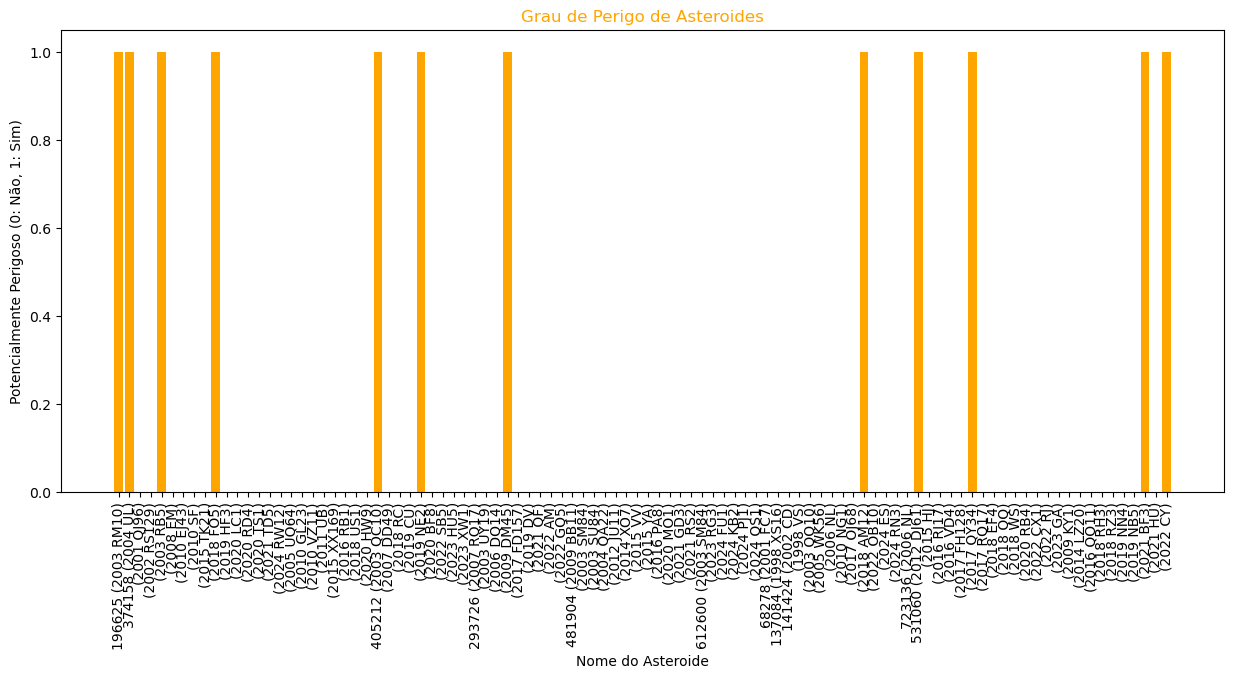

In [10]:
#Código de barras que relaciona o nome do asteroide com seu grau de perigo
plt.figure(figsize=(15, 6))
plt.bar(df['name'], df['is_potentially_hazardous_asteroid'], color = 'orange')
plt.xlabel('Nome do Asteroide')
plt.ylabel('Potencialmente Perigoso (0: Não, 1: Sim)')
plt.title('Grau de Perigo de Asteroides', color = 'orange')
plt.xticks(rotation=90)  
plt.show()

Com base na análise desse gráfico de barras com eixo x sendo o nome dos asteroides e o eixo y como o grau de perigosidade, nota-se que entre o dia 03 de setembro de 2003 e o dia 10 de setembro de 2003 a Terra teve mais ocorrências de asteroides não perigosos.

lINK DO CÓDIGO NO GITHUB: https://github.com/santossarah/API-Asteroides-NeoWs